In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Tele_data=pd.read_csv('D:\\WA_Fn-UseC_-Telco-Customer-Churn.csv')
Tele_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
Tele_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
Tele_data.shape

(7043, 21)

In [5]:
#here copied original dataset Tele_data as tele_data variable:
tele_data=Tele_data.copy()

In [6]:
tele_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
tele_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#droping the customerID:
tele_data.drop('customerID',axis=1,inplace=True)

In [9]:
tele_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#it is in string format convert it into int or float
pd.to_numeric(tele_data['TotalCharges'],errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
# tele_data[code] is only shows   null values rows and errors='coerce' shows null values as Nan
#tele_data[pd.to_numeric(tele_data.TotalCharges,errors='coerce').isnull()]
tele_data['TotalCharges'] = pd.to_numeric(tele_data['TotalCharges'], errors='coerce')
New_TeleData = tele_data.dropna(subset=['TotalCharges'])
New_TeleData.reset_index(drop=True, inplace=True)
print(New_TeleData.shape)


(7032, 20)


In [12]:
tele_data.iloc[488]['TotalCharges']

nan

In [13]:
#let's drop this all 11 columns:
#New_TeleData=tele_data[tele_data.TotalCharges!='']
#New_TeleData = tele_data[~pd.isna(tele_data['TotalCharges'])]
##New_TeleData.reset_index(drop=True, inplace=True)
New_TeleData.shape

(7032, 20)

In [14]:
New_TeleData.TotalCharges=pd.to_numeric(New_TeleData['TotalCharges'])
New_TeleData.dtypes

C:\Users\DELL\AppData\Local\Temp\ipykernel_1896\1492586824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_TeleData.TotalCharges=pd.to_numeric(New_TeleData['TotalCharges'])


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

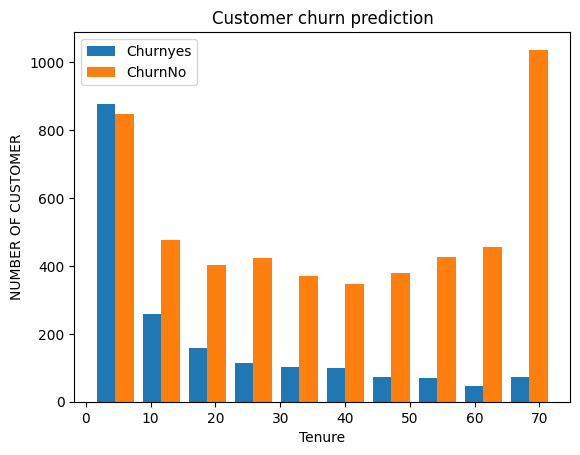

In [15]:
#checking how many loyal customer is leaving and not leaving:with the help of histogram:
tenure_churn_no=New_TeleData[New_TeleData.Churn=='No'].tenure #0 means they are leaving  and other values shows not leaving 
tenure_churn_yes=New_TeleData[New_TeleData.Churn=='Yes'].tenure
plt.xlabel('Tenure')
plt.ylabel('NUMBER OF CUSTOMER')
plt.title('Customer churn prediction')
plt.hist([tenure_churn_yes,tenure_churn_no],label=['Churnyes','ChurnNo'])
plt.legend()

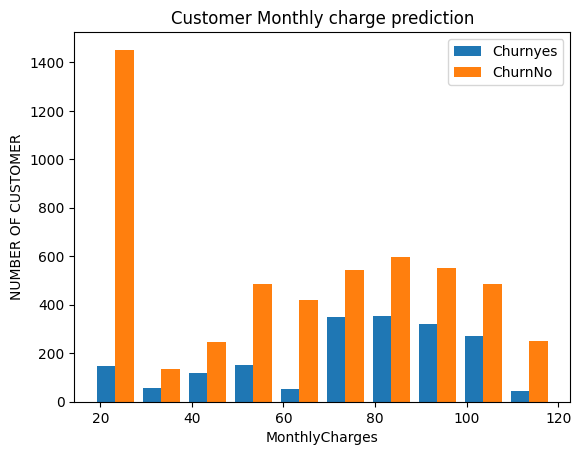

In [16]:
tenure_churn_no=New_TeleData[New_TeleData.Churn=='No'].MonthlyCharges #0 means they are leaving  and other values shows not leaving 
tenure_churn_yes=New_TeleData[New_TeleData.Churn=='Yes'].MonthlyCharges
plt.xlabel('MonthlyCharges')
plt.ylabel('NUMBER OF CUSTOMER')
plt.title('Customer Monthly charge prediction')
plt.hist([tenure_churn_yes,tenure_churn_no],label=['Churnyes','ChurnNo'])
plt.legend()

In [17]:
def Telecom_new_columns_values(New_TeleData):
    for columns in New_TeleData:
        if New_TeleData[columns].dtypes=='object':
            print(f'{columns}:{New_TeleData[columns].unique()}')

In [18]:
Telecom_new_columns_values(New_TeleData)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [19]:
New_TeleData.replace('No internet service','No',inplace=True)
New_TeleData.replace('No phone service','No',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1896\3735053166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_TeleData.replace('No internet service','No',inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1896\3735053166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_TeleData.replace('No phone service','No',inplace=True)


In [20]:
 Telecom_new_columns_values(New_TeleData)


gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [21]:
All_column_with_Yes_No=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                       'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in All_column_with_Yes_No:
    New_TeleData[col].replace({'Yes':1,'No':0},inplace=True)
    

C:\Users\DELL\AppData\Local\Temp\ipykernel_1896\433461342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_TeleData[col].replace({'Yes':1,'No':0},inplace=True)


In [22]:
 Telecom_new_columns_values(New_TeleData)


gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
New_TeleData['gender'].replace({'Female':1,'Male':0},inplace=True)
New_TeleData.gender.values

C:\Users\DELL\AppData\Local\Temp\ipykernel_1896\1603772951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_TeleData['gender'].replace({'Female':1,'Male':0},inplace=True)


array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [24]:
 Telecom_new_columns_values(New_TeleData)


InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [25]:
New_TeleData=pd.get_dummies(data=New_TeleData,columns=['InternetService','Contract','PaymentMethod'],dtype=int)


In [26]:
New_TeleData['TotalCharges'].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [27]:
New_TeleData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [29]:
New_TeleData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [30]:
New_TeleData.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [34]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
New_TeleData[col_to_scale]=scaler.fit_transform(New_TeleData[col_to_scale])

In [37]:
New_TeleData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [36]:
New_TeleData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
x=New_TeleData.drop('Churn',axis='columns')
y=New_TeleData['Churn']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [40]:
x_train.shape

(5625, 26)

In [41]:
x_test.shape

(1407, 26)

In [43]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5655,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2616,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1323,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3601,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2768,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1931,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5378,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4324,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [49]:
len(x_train.columns)

26

In [50]:
import tensorflow as tf
from tensorflow import keras

In [54]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.4910 - accuracy: 0.7417
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4351 - accuracy: 0.7813
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.7986
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4213 - accuracy: 0.8025
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4174 - accuracy: 0.8016
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8030
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8076
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8055
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4094 - accuracy: 0.8066
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4074 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.3597 - accuracy: 0.8276
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.8258
Epoch 83/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.8277
Epoch 84/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8272
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3595 - accuracy: 0.8299
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3587 - accuracy: 0.8261
Epoch 87/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8293
Epoch 88/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.8316
Epoch 89/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3574 - accuracy: 0.8281
Epoch 90/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 

In [55]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7711


[0.4804559051990509, 0.7711442708969116]

In [58]:
y_pred=model.predict(x_test)
y_pred[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.18608862],
       [0.45085642],
       [0.04727707],
       [0.89066035],
       [0.42110217]], dtype=float32)

In [59]:
y_test[:5]

2655    0
743     0
5570    1
64      1
3282    1
Name: Churn, dtype: int64

In [61]:
y_predi=[]
for i in y_pred:
    if i>0.5:
        y_predi.append(1)
    else:
        y_predi.append(0)

        

In [62]:
y_predi[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [64]:
y_test[:10]

2655    0
743     0
5570    1
64      1
3282    1
814     1
2665    0
5911    0
1020    0
6078    0
Name: Churn, dtype: int64

In [66]:
#classification report:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predi))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       999
           1       0.63      0.51      0.56       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

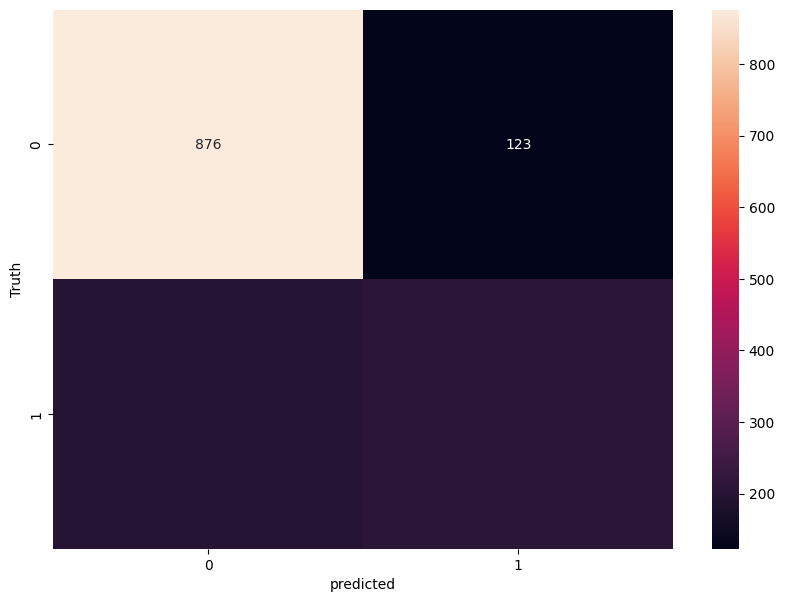

In [71]:
#confusion matrix:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predi)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')